<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>
# Deep Learning for Image Classification Assessment


Welcome to your assessment! Follow the instructions in bold below to complete the assessment.

If you get stuck, check out the solutions video and notebook. (Make sure to run the solutions notebook before posting a question to the QA forum please, thanks!)

------------

## The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## The Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [1]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [2]:
from matplotlib.image import imread 
import matplotlib.pyplot as plt 

In [3]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

&lt;matplotlib.image.AxesImage at 0x2e55ac1b130&gt;

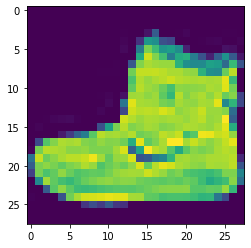

In [4]:
plt.imshow(x_train[0])

In [5]:
input_shape=x_train.shape

## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [6]:
x_test=x_test/255

In [7]:
x_train=x_train/255

In [8]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [9]:
x_train=x_train.reshape(60000,28,28,1)

In [10]:
x_test.shape

(10000, 28, 28)

In [11]:
x_test=x_test.reshape(10000, 28, 28,1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [12]:
from tensorflow.keras.utils import to_categorical 

In [13]:
y_cat_train=to_categorical(y_train)

In [14]:
y_cat_test=to_categorical(y_test)

## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,Dropout

In [16]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),padding='valid',strides=(2,2),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
#model.add(Dropout(0.4))
#model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
model.summary()

Model: &quot;sequential&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 13, 13, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               147584    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 149,418
Trainable params: 149,418
Non-trainable params: 0
_________________________________________________________________


### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [18]:
from tensorflow.keras.callbacks import EarlyStopping
earl=EarlyStopping(monitor='val_loss',patience=3)

model.fit(x_train,y_cat_train,epochs=20,batch_size=128,validation_data=(x_test,y_cat_test),callbacks=earl)

Epoch 1/20
469/469 [==============================] - 6s 14ms/step - loss: 0.5788 - accuracy: 0.7912 - val_loss: 0.4444 - val_accuracy: 0.8365
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 0.3871 - accuracy: 0.8610 - val_loss: 0.3902 - val_accuracy: 0.8619
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 0.3365 - accuracy: 0.8767 - val_loss: 0.3430 - val_accuracy: 0.8753
Epoch 4/20
469/469 [==============================] - 6s 12ms/step - loss: 0.3024 - accuracy: 0.8898 - val_loss: 0.3429 - val_accuracy: 0.8725
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 0.2799 - accuracy: 0.8976 - val_loss: 0.3062 - val_accuracy: 0.8887
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 0.2611 - accuracy: 0.9046 - val_loss: 0.3099 - val_accuracy: 0.8828
Epoch 7/20
469/469 [==============================] - 6s 13ms/step - loss: 0.2455 - accuracy: 0.9104 - val_loss: 0.2880 - val_accuracy: 0.8948

&lt;tensorflow.python.keras.callbacks.History at 0x2e55afc4d00&gt;

### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [19]:
import pandas as pd 
metrics=pd.DataFrame(model.history.history)
metrics.columns

Index([&#39;loss&#39;, &#39;accuracy&#39;, &#39;val_loss&#39;, &#39;val_accuracy&#39;], dtype=&#39;object&#39;)

In [20]:
metrics[['loss','accuracy']]

,loss,accuracy
0,0.578752,0.791167
1,0.387092,0.860967
2,0.336479,0.876717
3,0.302421,0.889783
4,0.279916,0.897617
5,0.261117,0.904633
6,0.245487,0.910433
7,0.231674,0.914000
8,0.218666,0.919867
9,0.207994,0.923233


In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
predictions=model.predict_classes(x_test)



Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) &gt; 0.5).astype(&quot;int32&quot;)`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [23]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.77      0.91      0.83      1000
           3       0.91      0.90      0.91      1000
           4       0.86      0.81      0.84      1000
           5       0.98      0.98      0.98      1000
           6       0.82      0.59      0.69      1000
           7       0.96      0.96      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [24]:
print(confusion_matrix(y_test,predictions))

[[906   0  29  12   3   1  43   0   6   0]
 [  2 974   0  16   5   0   0   0   3   0]
 [ 20   0 908   7  35   1  27   0   2   0]
 [ 31   5  22 901  23   0  14   0   4   0]
 [  3   1 106  33 813   1  43   0   0   0]
 [  0   0   0   0   0 977   0  11   1  11]
 [202   1 111  18  62   0 595   0  11   0]
 [  0   0   0   0   0  15   0 956   1  28]
 [  4   1   4   4   2   1   1   4 978   1]
 [  1   0   0   0   0   6   0  21   0 972]]


# Great Job!